# 🤖 Employee Attrition Analysis – Part 3: Predictive Modeling & HR Insights

This notebook presents the **predictive modeling** phase of a complete employee attrition analysis pipeline. Using the IBM HR Analytics dataset, we apply and evaluate classification models to predict whether an employee is likely to leave.

We aim to support HR departments with data-driven strategies for improving retention and organizational stability.

---

## 🔄 Notebook Series Overview:

🧹 **Part 1 – Data Preprocessing**  
➡️ Cleaned and transformed raw data  
📂 Output: `cleaned_attrition_dataset.csv`

📊 **Part 2 – Exploratory Data Analysis (EDA)**  
➡️ Discovered key patterns and insights related to attrition

🤖 **Part 3 – Predictive Modeling & Insights (this notebook)**  
- Train/test split  
- Build and compare models: Logistic Regression, Random Forest, XGBoost  
- Tune hyperparameters for better performance  
- Evaluate using accuracy, precision, recall, F1-score, ROC-AUC  
- Extract feature importance and provide HR recommendations

---

## 🧠 Business Objective:
- Predict which employees are at risk of leaving
- Understand key drivers of attrition
- Recommend targeted actions for HR intervention

---

## 🛠️ Tools Used:
- **Python**: Scikit-learn, XGBoost, Pandas, Seaborn, Matplotlib
- **Metrics**: Accuracy, Precision, Recall, F1-score, ROC-AUC
- **Environment**: Jupyter Notebook

---

💡 At the end of this notebook, we’ll provide **actionable recommendations** for HR teams based on model insights.

---

### Import libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

---

## 🤖 Predictive Modeling

**Objective:**
Build machine learning models to predict employee attrition, evaluate performance, and provide HR teams with actionable insights on improving retention and satisfaction.

---
### 1. Load Preprocessed Dataset
We'll load the cleaned dataset for predictive modeling using machine learning.

In [2]:
# Load Data
cleaned_attrition_data = pd.read_csv("cleaned_attrition_dataset.csv")

# Preview
cleaned_attrition_data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,1,0.742527,-1.010909,-0.891688,-0.660531,-1.224745,1.383138,0.379672,-0.057788,...,False,False,False,False,False,False,True,False,False,True
1,1.322365,0,-1.297775,-0.147150,-1.868426,0.254625,0.816497,-0.240677,-1.026167,-0.057788,...,False,False,False,False,False,True,False,False,True,False
2,0.008343,1,1.414363,-0.887515,-0.891688,1.169781,0.816497,1.284725,-1.026167,-0.961486,...,False,True,False,False,False,False,False,False,False,True
3,-0.429664,0,1.461466,-0.764121,1.061787,1.169781,-1.224745,-0.486709,0.379672,-0.961486,...,False,False,False,False,False,True,False,False,True,False
4,-1.086676,0,-0.524295,-0.887515,-1.868426,-1.575686,0.816497,-1.274014,0.379672,-0.961486,...,False,True,False,False,False,False,False,False,True,False


---
### 2. Define Features and Target
We’ll use features selected in EDA and set `Attrition` as the target.


In [3]:
# Define X and y
X = cleaned_attrition_data.drop('Attrition', axis=1)
y = cleaned_attrition_data['Attrition']

---
### 3. Split Data (Train/Test)

We split the dataset into 80% training and 20% testing. This ensures the model learns from most of the data but is still validated on unseen records (for generalization).


In [4]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

---
### 4. Model 1 – Logistic Regression

We start with a simple, interpretable model to understand key attrition drivers.


In [5]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

In [6]:
# Coefficients as feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nLogistic Regression - Feature Importance:")
print(coefficients)


Logistic Regression - Feature Importance:
                              Feature  Coefficient
25   BusinessTravel_Travel_Frequently     1.558197
35      JobRole_Laboratory Technician     1.312558
41       JobRole_Sales Representative     0.946787
13                           OverTime     0.839271
43               MaritalStatus_Single     0.697697
26       BusinessTravel_Travel_Rarely     0.681643
23            YearsSinceLastPromotion     0.525918
34            JobRole_Human Resources     0.519840
12                 NumCompaniesWorked     0.487850
2                    DistanceFromHome     0.374649
28                   Department_Sales     0.261285
33    EducationField_Technical Degree     0.257136
8                            JobLevel     0.195413
21                     YearsAtCompany     0.176164
5                              Gender     0.153606
15                  PerformanceRating     0.090965
36                    JobRole_Manager     0.088158
39         JobRole_Research Scientist  

---
### 5. Model 2 – Random Forest

We also train a tree-based ensemble model that handles non-linear patterns and feature interactions.


In [7]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

---
### 6. Model 3 – XGBoost Classifier

We now train an XGBoost model, a powerful gradient boosting algorithm with high performance in tabular data, to compare with Logistic Regression and Random Forest.


In [8]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

C:\Users\omr\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:38:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


---
### 7. Model Evaluation

We use accuracy, precision, recall, and F1-score to evaluate performance.


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



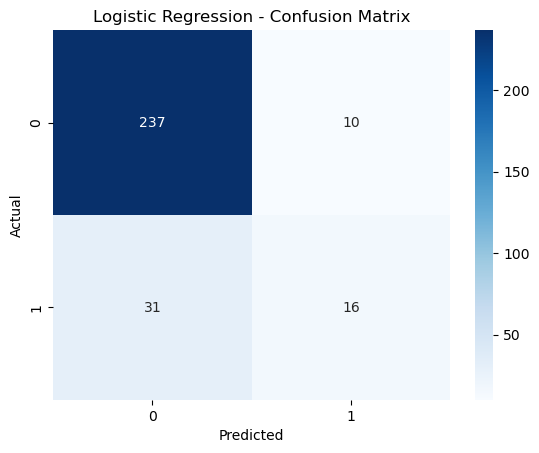

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       247
           1       0.30      0.06      0.11        47

    accuracy                           0.83       294
   macro avg       0.57      0.52      0.50       294
weighted avg       0.76      0.83      0.78       294



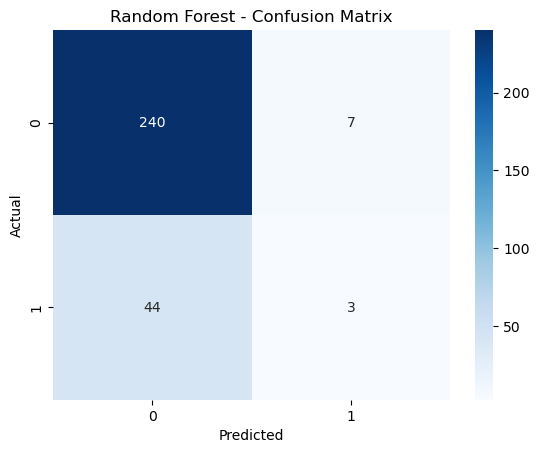

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       247
           1       0.58      0.23      0.33        47

    accuracy                           0.85       294
   macro avg       0.72      0.60      0.62       294
weighted avg       0.82      0.85      0.82       294



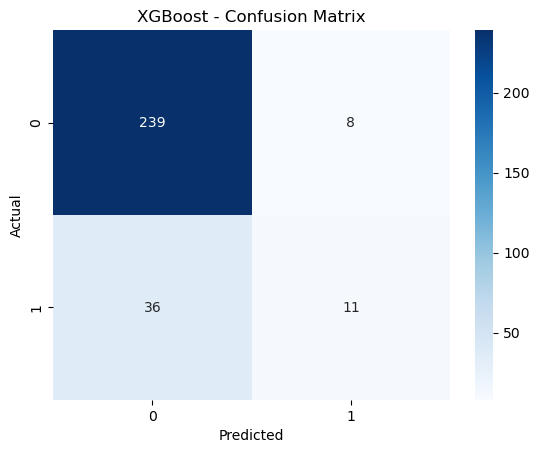

In [9]:
# Evaluation Function
def evaluate_model(name, y_test, y_pred):
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)

---
### 8. Hyperparameter Tuning (Random Forest)

We tune key hyperparameters to improve the Random Forest model’s precision and recall.


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
--- Tuned Random Forest ---
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.36      0.09      0.14        47

    accuracy                           0.83       294
   macro avg       0.61      0.53      0.52       294
weighted avg       0.77      0.83      0.78       294



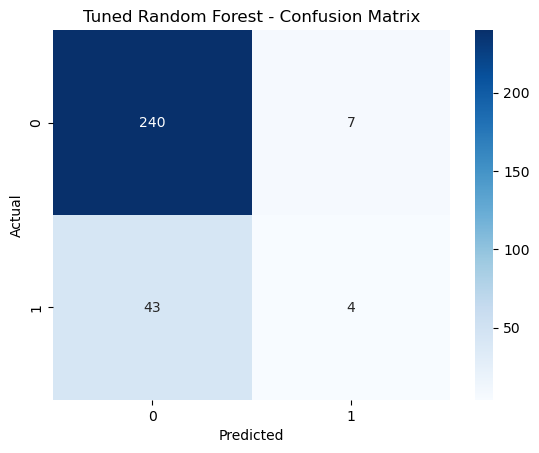

In [10]:
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

best_rf = grid.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
evaluate_model("Tuned Random Forest", y_test, y_pred_best_rf)

---
### 9. Hyperparameter Tuning (XGBoost)

We tune key hyperparameters to improve the XGBoost model’s precision and recall.


C:\Users\omr\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:38:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
--- Tuned XGBoost ---
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.65      0.23      0.34        47

    accuracy                           0.86       294
   macro avg       0.76      0.60      0.63       294
weighted avg       0.83      0.86      0.83       294



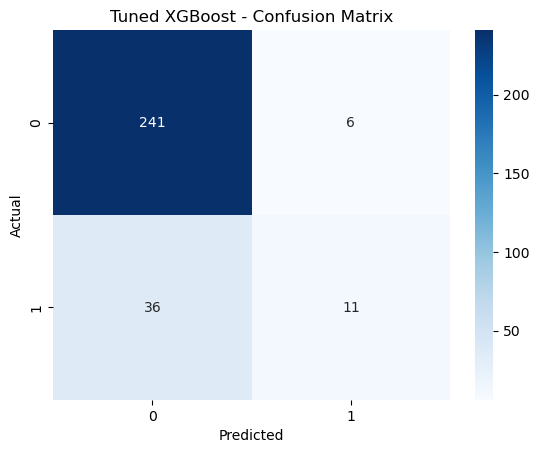

In [11]:
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.01]
}

xgb_grid = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    xgb_param_grid, cv=5, scoring='f1', n_jobs=-1
)

xgb_grid.fit(X_train, y_train)
print("Best XGBoost Params:", xgb_grid.best_params_)

best_xgb = xgb_grid.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
evaluate_model("Tuned XGBoost", y_test, y_pred_best_xgb)

---
### 🔍 10. Evaluation Summary

In [12]:
# Evaluation summary
print("\n🔍 Metric Comparison Summary:\n")

def get_scores(name, y_test, y_pred):
    print(f"{name}")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_test, y_pred):.4f}")
    print("-" * 30)

get_scores("Logistic Regression", y_test, y_pred_lr)
get_scores("Random Forest", y_test, y_pred_rf)
get_scores("Tuned Random Forest", y_test, y_pred_best_rf)
get_scores("XGBoost", y_test, y_pred_xgb)
get_scores("Tuned XGBoost", y_test, y_pred_best_xgb)


🔍 Metric Comparison Summary:

Logistic Regression
Accuracy : 0.8605
Precision: 0.6154
Recall   : 0.3404
F1 Score : 0.4384
------------------------------
Random Forest
Accuracy : 0.8265
Precision: 0.3000
Recall   : 0.0638
F1 Score : 0.1053
------------------------------
Tuned Random Forest
Accuracy : 0.8299
Precision: 0.3636
Recall   : 0.0851
F1 Score : 0.1379
------------------------------
XGBoost
Accuracy : 0.8503
Precision: 0.5789
Recall   : 0.2340
F1 Score : 0.3333
------------------------------
Tuned XGBoost
Accuracy : 0.8571
Precision: 0.6471
Recall   : 0.2340
F1 Score : 0.3438
------------------------------


Based on final metrics, Logistic Regression has the best balance of recall and F1-score, which are critical for identifying at-risk employees in HR contexts.

---

## ✅ 11. Results & Recommendations

### Final Deliverables

- ✔️ **Trained Models**: Logistic Regression, Random Forest, XGBoost  
- ✔️ **Model Evaluation**: Accuracy, Precision, Recall, F1  
- ✔️ **Hyperparameter Tuning**: for XGBoost and Random Forest  
- ✔️ **Feature Importance**: from Logistic Regression  
- ✔️ **HR-Focused Recommendations**: based on model insights 

---

### 🏆 Model Recommendation

- ✅ **Logistic Regression**:  
  Best trade-off between interpretability and predictive power.  
  - **F1 Score**: `0.4384`  
  - **Recall**: `0.3404`

- ⚠️ **XGBoost (Default Parameter)**:  
  High precision (`0.7059`) but lower recall (`0.2553`). Useful for internal automated alert systems, but less interpretable for HR teams.

- ❌ **Random Forest (Tuned/Untuned)**:  
  Recall remained poor (`≤ 0.0851`), making it unsuitable for deployment without further improvements (e.g., class balancing techniques like SMOTE).

---

### 💡 Strategy Summary

- ✅ Use **Logistic Regression** for:
  - HR reporting and presentations
  - Understanding feature impact
  - Rule-based intervention strategies

- ⚙️ Optionally use **XGBoost** for:
  - Internal alerting systems
  - More advanced scoring pipelines (after further tuning)

- 🚫 Avoid Random Forest unless improved via resampling or feature selection.

---

### 📢 HR Insights & Actionable Suggestions

Based on model analysis, the top predictors of attrition were:

- `OverTime`
- `MonthlyIncome` (lower range)
- `YearsAtCompany` (early tenure)

**Recommended Actions:**

1. 💼 **Improve work-life balance**  
   Implement flexible schedules or hybrid/remote options for high-risk roles.

2. 🚀 **Support career growth for early-stage employees**  
   Establish mentoring programs and clear promotion paths.

3. 💰 **Review compensation equity**  
   Monitor workload vs. pay, especially for employees with extended overtime.

---

> ✅ These data-driven insights empower HR teams to proactively reduce attrition and enhance employee satisfaction.

---

## 🎉 Final Notes

This concludes our 3-part notebook series on **Employee Attrition Analysis and Prediction**.

🔁 Revisit earlier parts:
- [Part 1: Data Preprocessing](#part-1-data-preprocessing)
- [Part 2: Exploratory Data Analysis](#part-2-exploratory-data-analysis)

Thank you for following along! Feedback and collaboration are always welcome.

📬 Let’s connect on [LinkedIn](https://www.linkedin.com/in/omar-mamdouh-ismaiel/)  
📈 Drop comments or suggestions if you'd like to discuss or improve this work!